### Análisis de Segmentación (K-Means)

Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Base de datos

In [2]:
df = pd.read_csv('Mall_Customers.csv', delimiter= ',')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploración de la data

In [3]:
df.shape

(200, 5)

In [4]:
## Validamos el número de clientes únicos en la base
len(df.CustomerID.unique())

200

In [5]:
# Estructura de los datos
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [6]:
# Renombrando las variables del Dataframe
df.columns=['CustomerID','Gender','Age','AnnualIncome','SpendingScore']
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [8]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


In [9]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
# Guardamos los identificadores de cliente y los excluimos del análisis de variables
df_index = df[['CustomerID']]
df = df.drop(['CustomerID'], axis = 1)

In [20]:
# Datos faltantes
df.isnull().sum()

,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0
AgeGroup,2


Visualización de datos

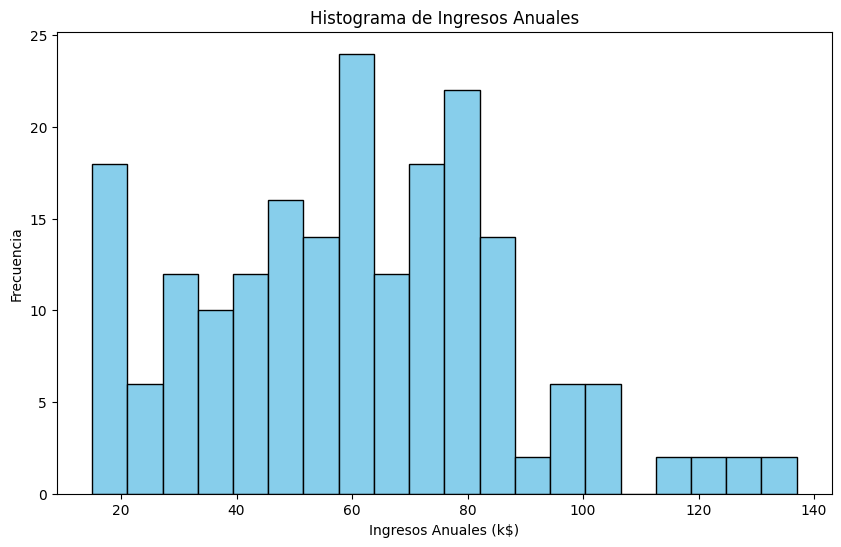

In [21]:

# Histograma de 'Annual Income (k$)'
plt.figure(figsize=(10, 6))
plt.hist(df['AnnualIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Ingresos Anuales')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Frecuencia')
plt.show()

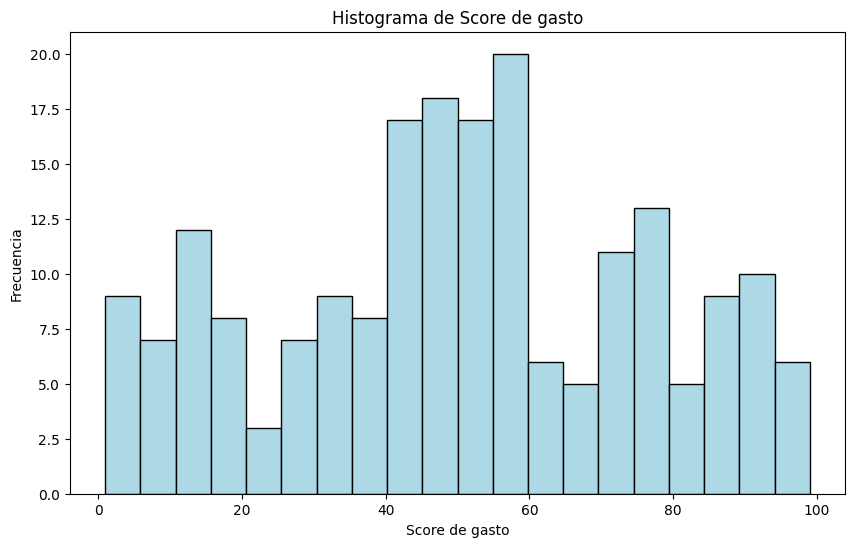

In [22]:
# Histograma de 'SpendingScore (1-100)'
plt.figure(figsize=(10, 6))
plt.hist(df['SpendingScore'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histograma de Score de gasto')
plt.xlabel('Score de gasto')
plt.ylabel('Frecuencia')
plt.show()

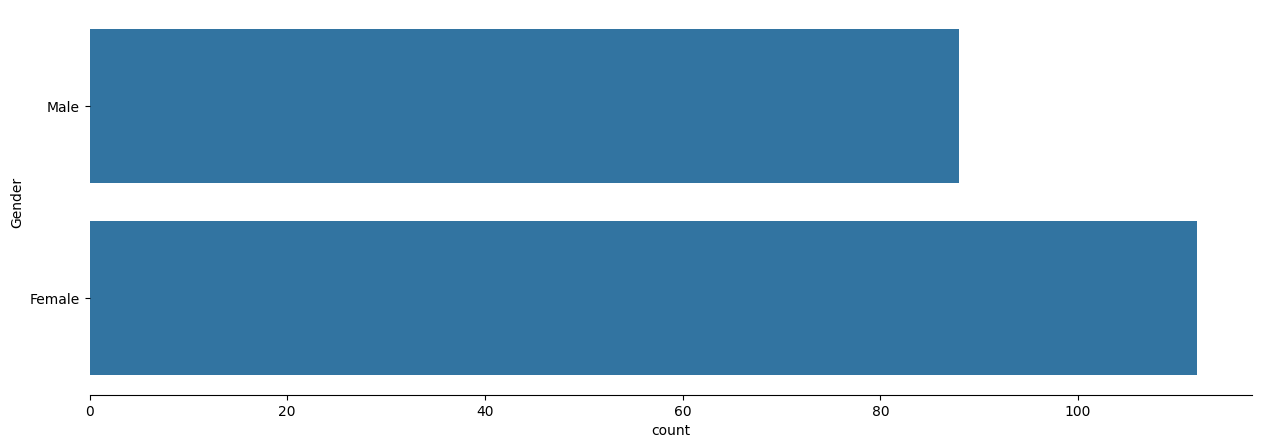

In [23]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
sns.despine(left=True)

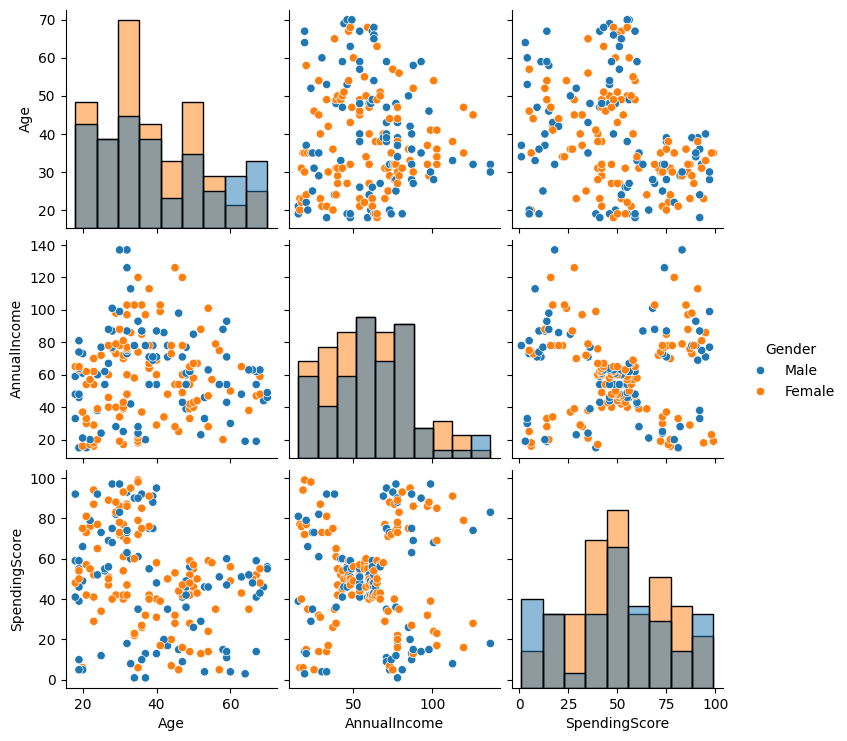

In [25]:
# Buscamos relación entre variables
sns.pairplot(df,hue="Gender",diag_kind="hist")

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

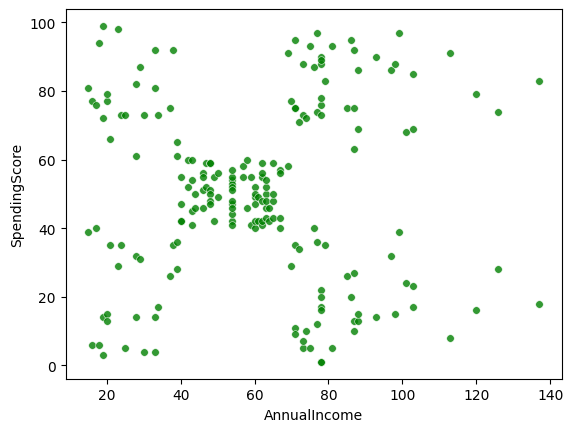

In [26]:
sns.scatterplot(x="AnnualIncome",y="SpendingScore", data=df,s=30, color="green",alpha=0.8)

Se puede observar separaciones marcadas entre las variables Annualincome y SpendingScore

Del análisis descriptivo y visual inicial retiramos las variables que no aportan a nuestro análisis: Edad y Género y creamos un nuevo Dataframe de nombre X quedándonos únicamente con las variables importantes

In [27]:
# Seleccionar las características relevantes
X = df[['AnnualIncome', 'SpendingScore']]

In [28]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determinar el número óptimo de clusters usando el método de Elbow (codo)

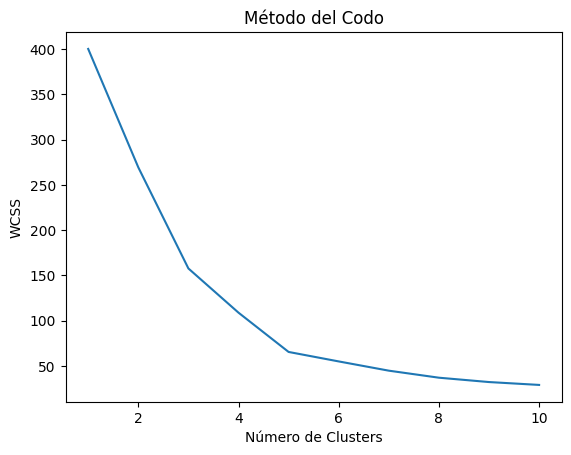

In [29]:
# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # WCSS: Within-cluster sum of squares
plt.show()

El método del codo nos sugiere también 5 clusters

## Entrenar el modelo K-means

In [30]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

Visualización de los clusters

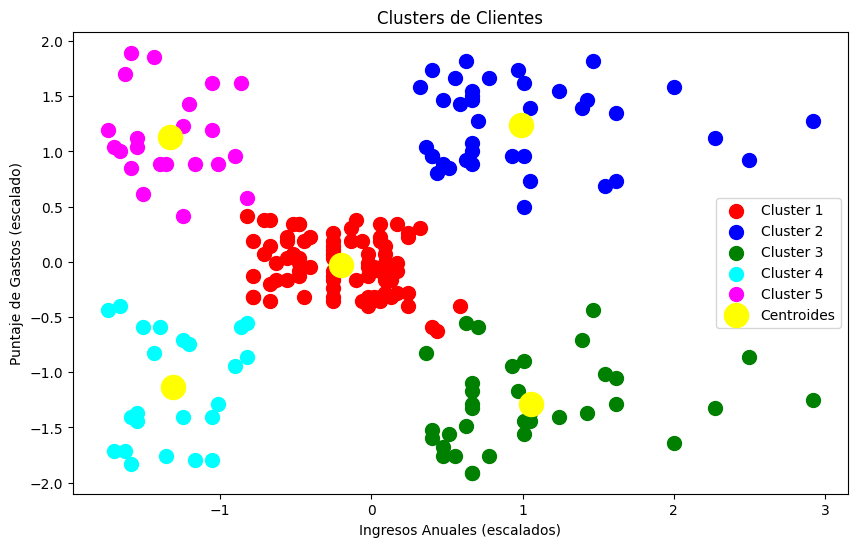

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Ingresos Anuales (escalados)')
plt.ylabel('Puntaje de Gastos (escalado)')
plt.legend()
plt.show()

In [ ]:
# Agregar los clusters al dataframe original
df['Cluster'] = clusters

In [33]:
# Adicionar la variable CustomerId
data = pd.merge(df_index, df, left_index=True, right_index=True)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,Cluster
0,1,Male,19,15,39,10-19,3
1,2,Male,21,15,81,20-29,4
2,3,Female,20,16,6,20-29,3
3,4,Female,23,16,77,20-29,4
4,5,Female,31,17,40,30-39,3


In [34]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,Cluster
0,1,Male,19,15,39,10-19,3
1,2,Male,21,15,81,20-29,4
2,3,Female,20,16,6,20-29,3
3,4,Female,23,16,77,20-29,4
4,5,Female,31,17,40,30-39,3


Visualización de los clusters

In [39]:
cluster_summary = data.groupby('Cluster').agg(
    Clientes=('CustomerID', 'count'),
    Edad_prom=('Age', 'mean'),
    AverageAnnualIncome=('AnnualIncome', 'mean'),
    AverageSpendingScore=('SpendingScore', 'mean')
).reset_index()

display(cluster_summary)

,Cluster,Clientes,Edad_prom,AverageAnnualIncome,AverageSpendingScore
0,0,81,42.716049,55.296296,49.518519
1,1,39,32.692308,86.538462,82.128205
2,2,35,41.114286,88.200000,17.114286
3,3,23,45.217391,26.304348,20.913043
4,4,22,25.272727,25.727273,79.363636


In [49]:
cluster_summary = data.groupby('Cluster').agg(
    Clientes=('CustomerID', 'count'),
    Edad=('Age', 'mean'),
    Ingreso_anual=('AnnualIncome', 'mean'),
    Score=('SpendingScore', 'mean')
).reset_index()

# Round the average columns to one decimal place
cluster_summary['Edad'] = cluster_summary['Edad'].round(1)
cluster_summary['Ingreso_anual'] = cluster_summary['Ingreso_anual'].round(1)
cluster_summary['Score'] = cluster_summary['Score'].round(1)

# Calculate the total row
total_row = pd.DataFrame({
    'Cluster': ['Total'],
    'Clientes': [cluster_summary['Clientes'].sum()],
    'Edad': [cluster_summary['Edad'].mean().round(1)],
    'Ingreso_anual': [cluster_summary['Ingreso_anual'].mean().round(1)],
    'Score': [cluster_summary['Score'].mean().round(1)]
})

# Prepend the total row to the summary table
cluster_summary = pd.concat([total_row, cluster_summary], ignore_index=True)

display(cluster_summary)

,Cluster,Clientes,Edad,Ingreso_anual,Score
0,Total,200,37.4,56.4,49.8
1,0,81,42.7,55.3,49.5
2,1,39,32.7,86.5,82.1
3,2,35,41.1,88.2,17.1
4,3,23,45.2,26.3,20.9
5,4,22,25.3,25.7,79.4


**Descripción de cada Clúster**

**Clúster 0:** Es el grupo más grande, con una edad promedio de alrededor de 43 años, ingreso anual moderado (55 mil) y puntaje de gasto también moderado (50). Este grupo probablemente representa a la base promedio de clientes.

**Clúster 1:** Este grupo tiene una edad promedio más joven (33 años), alto ingreso anual (87 mil) y un puntaje de gasto alto (~82). Probablemente son clientes con altos ingresos y alto nivel de gasto.

**Clúster 2:** Tiene una edad promedio mayor (41 años), alto ingreso anual (88 mil), pero un puntaje de gasto bajo (~17). Estos clientes probablemente tienen altos ingresos, pero gastan poco en el centro comercial.

**Clúster 3:** Edad promedio mayor (45 años), ingreso anual bajo (26 mil) y puntaje de gasto también bajo (~21). Probablemente representan clientes con menores ingresos y menor nivel de gasto.

**Clúster 4:** Es el grupo más joven en promedio (25 años), con ingresos anuales bajos (26 mil), pero un puntaje de gasto alto (~79). Probablemente son clientes jóvenes, con bajos ingresos pero con hábitos de gasto elevados.

In [47]:
cluster_summary = data.groupby('Cluster').agg(
    Clientes=('CustomerID', 'count'),
    Edad=('Age', 'mean'),
    Ingreso_anual=('AnnualIncome', 'mean'),
    Score=('SpendingScore', 'mean')
).reset_index()

# Round the average columns
cluster_summary['Edad'] = cluster_summary['Edad'].round(0) # Round age to 0 decimal places
cluster_summary['Ingreso_anual'] = cluster_summary['Ingreso_anual'].round(1)
cluster_summary['Score'] = cluster_summary['Score'].round(1)

# Add descriptive labels to the clusters
cluster_labels = {
    0: 'Clientes Promedio',
    1: 'Alto ingreso,Alto score',
    2: 'Alto ingreso,Bajo score',
    3: 'Bajo ingreso,Bajo score',
    4: 'Jóvenes,Bajo ingreso,Alto score'
}
cluster_summary['Cluster_Label'] = cluster_summary['Cluster'].map(cluster_labels)

# Calculate the total row
total_row = pd.DataFrame({
    'Cluster': ['Total'],
    'Cluster_Label': ['Total'], # Label for the total row
    'Clientes': [cluster_summary['Clientes'].sum()],
    'Edad': [cluster_summary['Edad'].mean().round(0)], # Round total age to 0 decimal places
    'Ingreso_anual': [cluster_summary['Ingreso_anual'].mean().round(1)],
    'Score': [cluster_summary['Score'].mean().round(1)]
})

# Prepend the total row to the summary table
cluster_summary = pd.concat([total_row, cluster_summary], ignore_index=True)

display(cluster_summary)

,Cluster,Cluster_Label,Clientes,Edad,Ingreso_anual,Score
0,Total,Total,200,37.0,56.4,49.8
1,0,Clientes Promedio,81,43.0,55.3,49.5
2,1,"Alto ingreso,Alto score",39,33.0,86.5,82.1
3,2,"Alto ingreso,Bajo score",35,41.0,88.2,17.1
4,3,"Bajo ingreso,Bajo score",23,45.0,26.3,20.9
5,4,"Jóvenes,Bajo ingreso,Alto score",22,25.0,25.7,79.4
